**Project Title:**
Air_Quality_Monitoring_and_Health_Risk_Assesment

**Problem Statement:**
Air pollution in India is rising at an alarming rate, with pollutants like PM2.5, PM10, NO2, and SO2 posing major risks to human health. There is a need for effective prediction of air quality and its related health impacts to support timely preventive action.

**Project Description:**
This project analyzes Indian air quality data and applies machine learning to predict AQI levels while classifying them into health risk categories such as Good, Moderate, Poor, and Severe, providing insights for public health and policy decisions.


In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
import joblib

df = pd.read_csv('city_day.csv')
df.head()




,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,204.5,Severe
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,2.01,19.41,2.86,60.9,Satisfactory
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,19.07,10.19,9.63,486.5,Severe
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,9.31,11.65,9.39,174.4,Very Poor
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,6.04,12.74,9.59,489.7,Good


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        18265 non-null  object 
 1   Datetime    18265 non-null  object 
 2   PM2.5       18265 non-null  float64
 3   PM10        18265 non-null  float64
 4   NO          18265 non-null  float64
 5   NO2         18265 non-null  float64
 6   NOx         18265 non-null  float64
 7   NH3         18265 non-null  float64
 8   CO          18265 non-null  float64
 9   SO2         18265 non-null  float64
 10  O3          18265 non-null  float64
 11  Benzene     18265 non-null  float64
 12  Toluene     18265 non-null  float64
 13  Xylene      18265 non-null  float64
 14  AQI         18265 non-null  float64
 15  AQI_Bucket  18265 non-null  object 
dtypes: float64(13), object(3)
memory usage: 2.2+ MB


In [150]:
df.isnull().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,18265.0,250.597695,144.460292,0.0,125.70,251.00,376.20,499.9
PM10,18265.0,299.442491,173.479906,0.0,150.10,300.30,450.00,600.0
NO,18265.0,100.481035,57.774795,0.0,50.60,100.20,151.00,200.0
NO2,18265.0,75.415916,43.460066,0.0,37.70,76.00,113.20,150.0
NOx,18265.0,125.964079,72.403893,0.0,63.10,126.20,188.90,250.0
NH3,18265.0,25.065042,14.452019,0.0,12.60,25.30,37.60,50.0
CO,18265.0,5.002451,2.889439,0.0,2.49,5.00,7.51,10.0
SO2,18265.0,49.835839,28.988739,0.0,24.40,49.90,75.10,100.0
O3,18265.0,100.406740,57.591436,0.0,50.60,100.70,150.40,200.0
Benzene,18265.0,10.070033,5.785282,0.0,5.08,10.08,15.11,20.0


In [152]:
df.shape

(18265, 16)

In [154]:
# columns
df.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

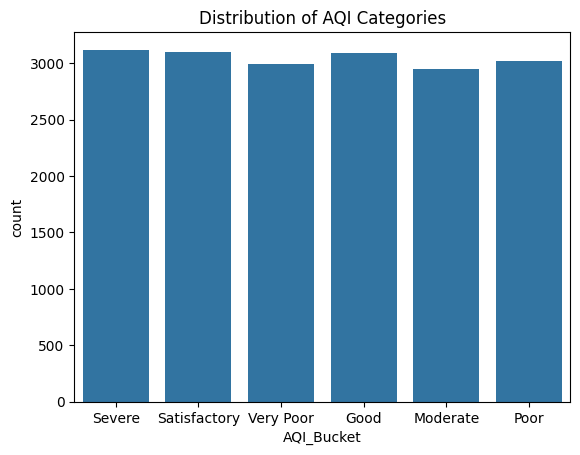

In [155]:
# Univariate Analysis
sns.countplot(x='AQI_Bucket', data=df)
plt.title('Distribution of AQI Categories')
plt.show()

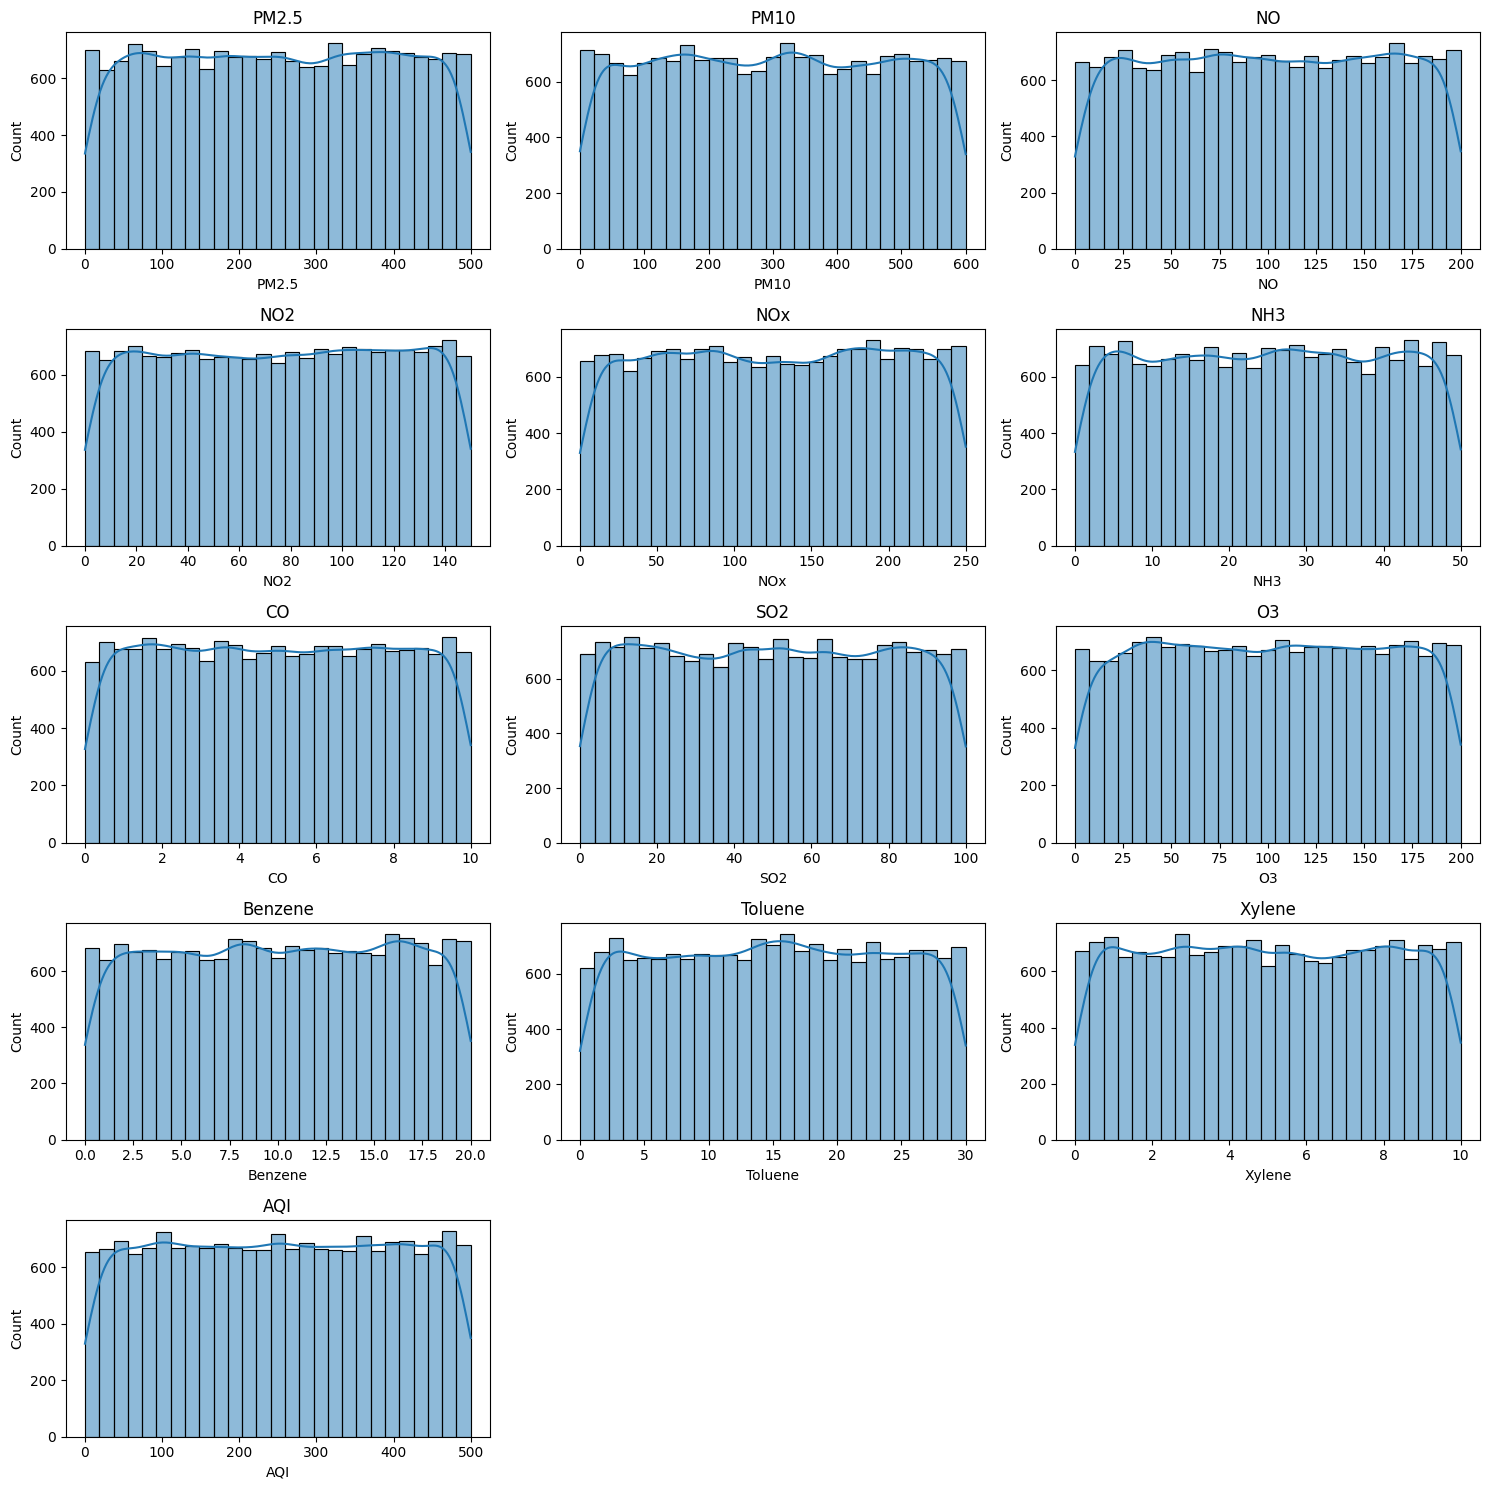

In [157]:
num_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()
for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], kde=True, ax = ax)
    ax.set_title(col)
# hide unused axes
for ax in range(len(num_cols), len(axes)):
    fig.delaxes(axes[ax])
plt.tight_layout()
plt.show()

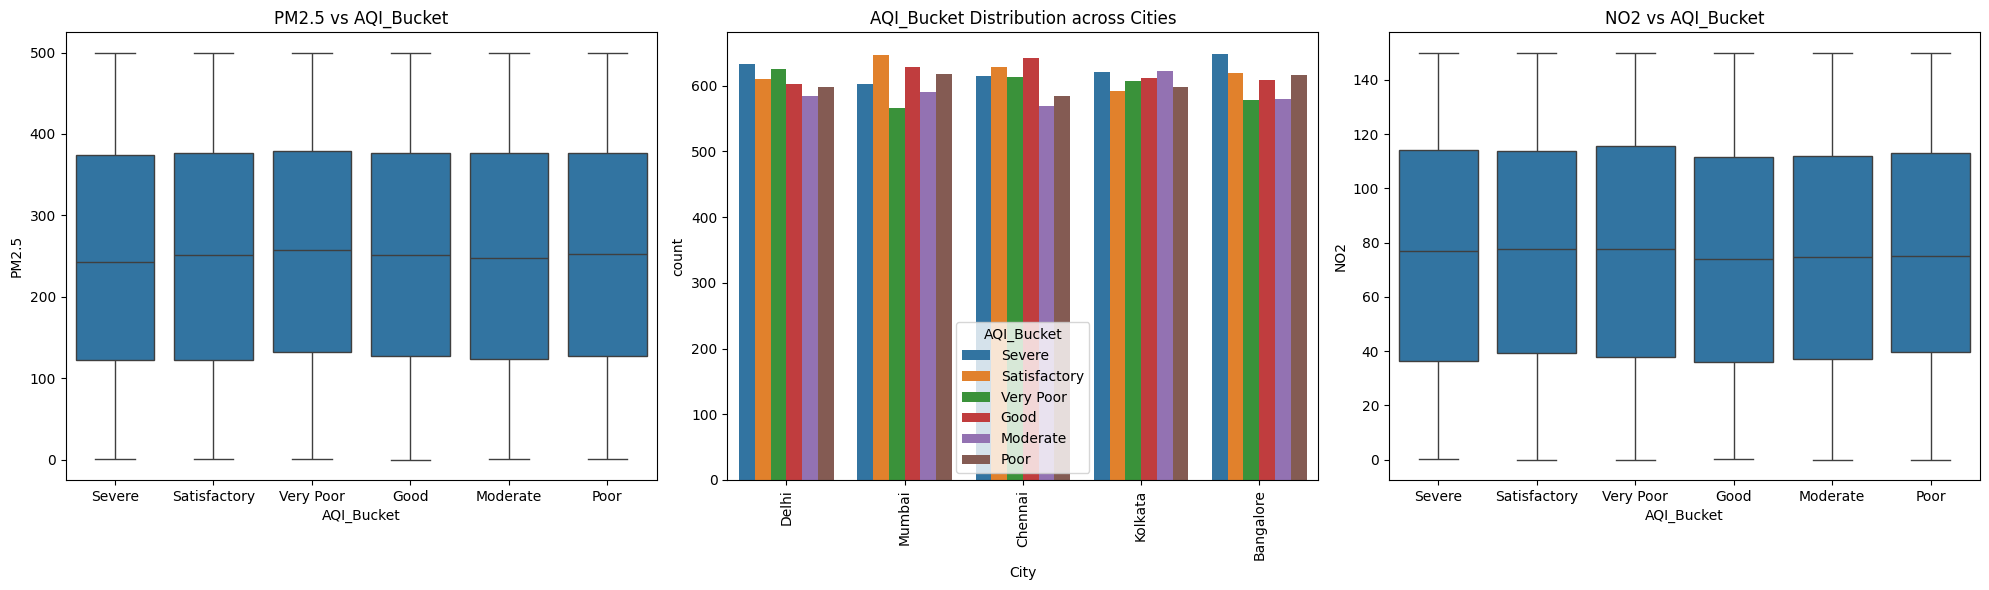

In [158]:
#Bivariate Analysis
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.boxplot(x="AQI_Bucket", y="PM2.5", data=df, ax=axes[0]).set_title("PM2.5 vs AQI_Bucket")
sns.countplot(x="City", hue="AQI_Bucket", data=df, ax=axes[1]).set_title("AQI_Bucket Distribution across Cities")
axes[1].tick_params(axis='x', rotation=90)
sns.boxplot(x="AQI_Bucket", y="NO2", data=df, ax=axes[2]).set_title("NO2 vs AQI_Bucket")

plt.tight_layout()
plt.show()

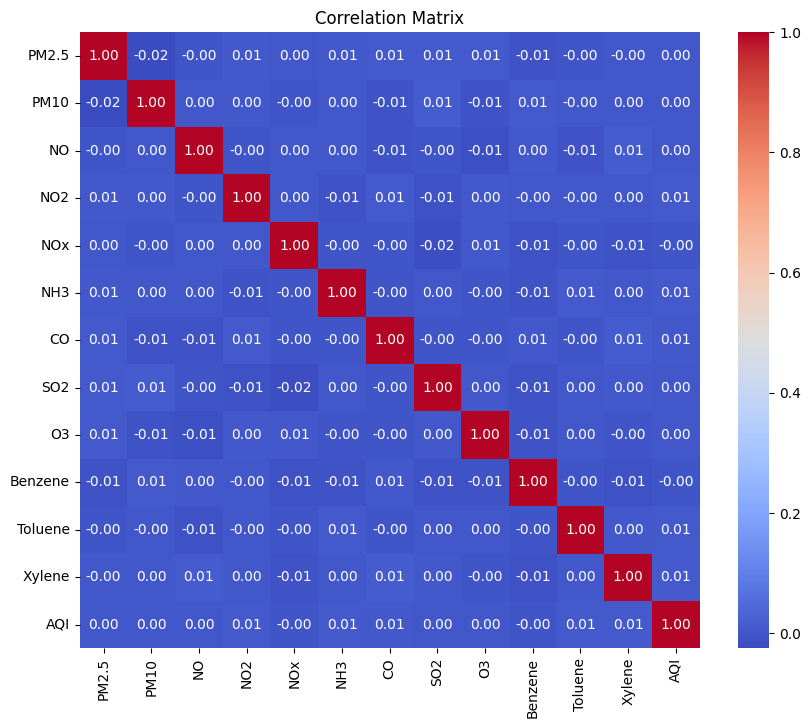

In [159]:
# Select only numerical columns
num_cols_corr = df.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

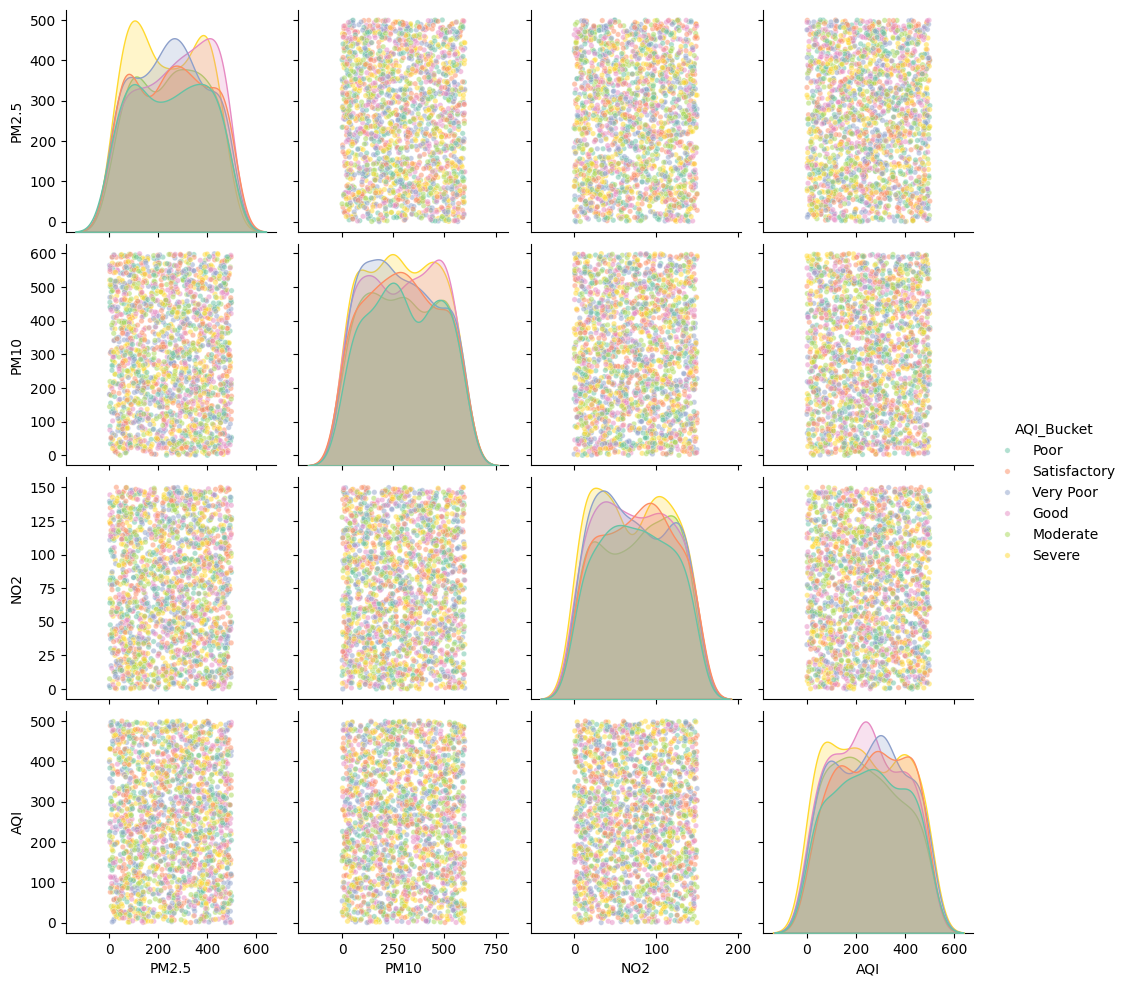

In [160]:
# Pick the most important columns for visualization
selected_features = ["PM2.5", "PM10", "NO2", "AQI"]

# Pairplot with AQI_Bucket as hue
sns.pairplot(
    df.sample(2000, random_state=42),
    vars=selected_features,
    hue="AQI_Bucket",
    diag_kind="kde",
    palette="Set2",
    plot_kws={"alpha": 0.5, "s": 15}
)
plt.show()
city_names = df['City'].unique().tolist()

In [161]:
#Data preprocessing 
# Use separate encoders
city_le = LabelEncoder()
aqi_le = LabelEncoder()

df['City'] = city_le.fit_transform(df['City'])
df['AQI_Bucket'] = aqi_le.fit_transform(df['AQI_Bucket'])

In [162]:
#Feature and Target selection 
X = df.drop(['AQI_Bucket', 'Datetime'], axis = 1)
y = df['AQI_Bucket']

In [163]:
#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
X_train.shape

(14612, 14)

In [165]:
X_test.shape

(3653, 14)

In [166]:
#scale num features
scaler = StandardScaler()
num_cols_scale = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols_scale] = scaler.fit_transform(X_train[num_cols_scale])
X_test[num_cols_scale] = scaler.transform(X_test[num_cols_scale])

In [167]:
X_train

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
12498,0.705039,-1.412744,0.502607,0.792209,-1.007088,1.494740,0.830532,1.266870,-0.888462,-1.021553,-0.094602,1.518771,-1.416624,0.811221
10510,-0.002956,-0.892004,1.699223,1.580442,0.698530,-0.872225,1.279302,-0.470889,-0.502284,0.767241,1.432684,-1.491173,-1.547751,0.084183
13972,-0.710950,0.920560,-1.630365,-1.440537,0.415793,-1.677325,0.126308,0.858393,-0.853982,0.668153,0.587839,0.847713,-0.215772,1.679377
13578,0.705039,0.835499,-0.827031,1.521411,1.043331,-0.158269,-1.551403,0.280294,-1.291880,0.546466,1.567445,0.245955,-0.094997,0.580865
6433,0.705039,1.026368,-1.285666,0.622062,-1.459927,1.378739,-0.722904,-1.457466,0.228695,-1.012861,1.109604,0.899688,-1.002537,-0.891196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-1.418945,-0.046925,-1.438930,0.481431,0.755997,-0.714796,1.175740,0.487994,-1.695297,0.633385,0.154187,-0.281882,0.163808,-0.837239
11964,-1.418945,-1.147188,-1.284509,0.623799,1.015747,-1.076607,-1.047400,1.370721,-0.764333,0.318738,-0.896255,1.589226,0.543387,1.045727
5390,-0.002956,1.019452,1.002884,1.403350,-0.804805,-0.908130,-0.453642,-0.657820,-0.729853,-0.952018,-0.239729,-0.061276,-0.170913,-0.374453
860,-0.002956,-1.470143,0.176415,-1.435328,-1.634627,0.077875,-1.233812,0.179905,-1.691849,-0.804256,-0.257006,0.460786,-0.205420,-0.476141


In [168]:
# Initialize the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf_classifier.predict(X_test)

In [169]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.1609635915685738

Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.18      0.17       615
           1       0.15      0.14      0.15       585
           2       0.15      0.17      0.16       573
           3       0.14      0.16      0.15       610
           4       0.21      0.19      0.20       673
           5       0.16      0.13      0.15       597

    accuracy                           0.16      3653
   macro avg       0.16      0.16      0.16      3653
weighted avg       0.16      0.16      0.16      3653



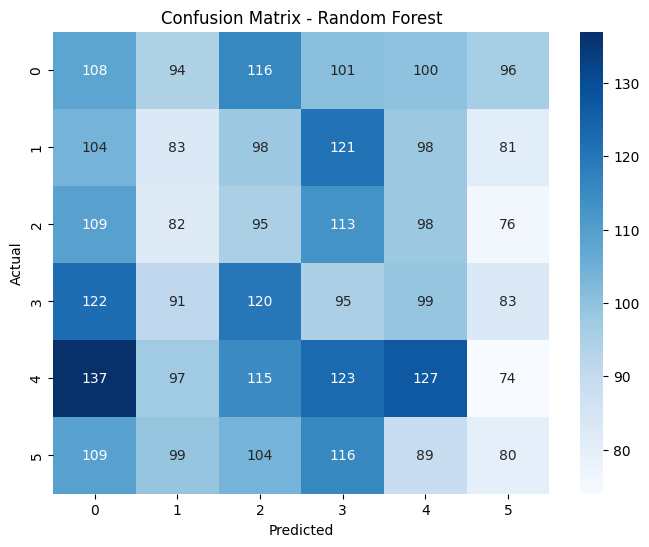

In [170]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

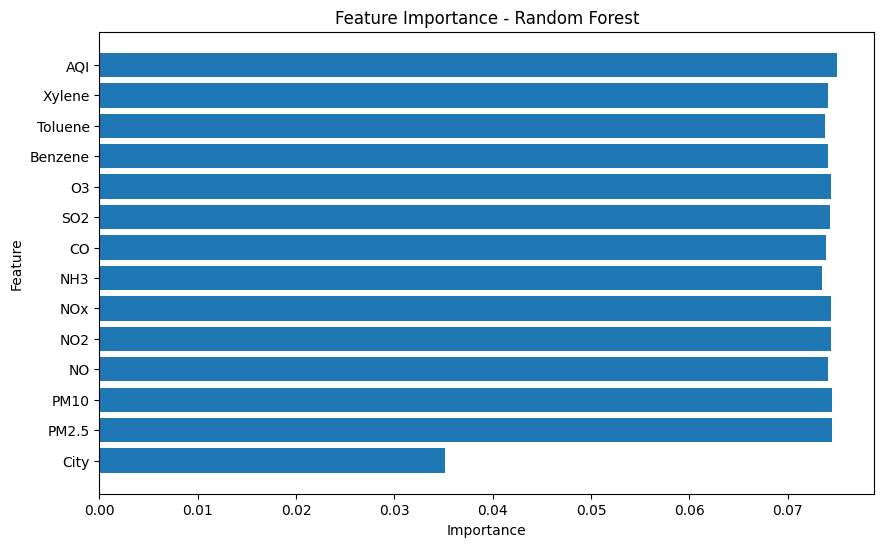

In [171]:
importances = rf_classifier.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()

Logistic Regression Accuracy: 0.1634273200109499

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.17      0.21      0.19       615
           1       0.17      0.13      0.15       585
           2       0.15      0.16      0.16       573
           3       0.15      0.16      0.15       610
           4       0.19      0.17      0.18       673
           5       0.15      0.14      0.15       597

    accuracy                           0.16      3653
   macro avg       0.16      0.16      0.16      3653
weighted avg       0.16      0.16      0.16      3653



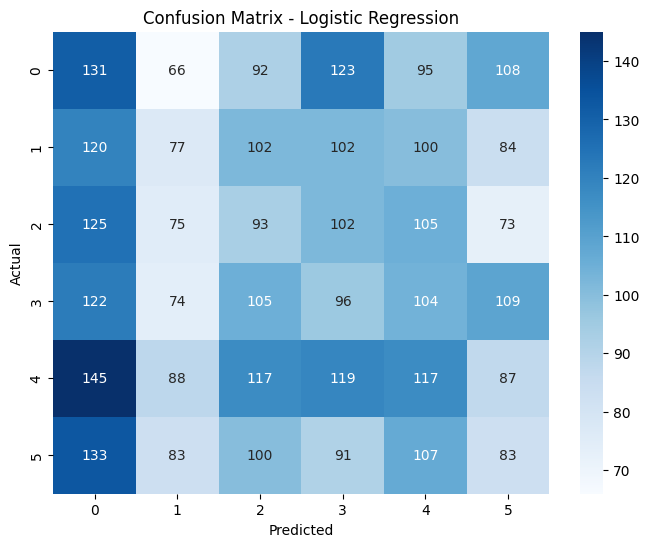

In [172]:
logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logistic))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [173]:
joblib.dump(rf_classifier, 'rf_aqi_model.pkl')
joblib.dump(logistic_model, 'logistic_aqi_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(city_le, 'label_encoder.pkl')  # This is for cities now
joblib.dump(aqi_le, 'aqi_label_encoder.pkl')  # Save AQI encoder separately
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')
cat_dict = {'City': city_names}  # Use original city names
joblib.dump(cat_dict, 'cat_dict.pkl')

['cat_dict.pkl']